In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [2]:
b=pd.read_csv('C:/Users/hp/Downloads/leftover/bank/bank.csv',sep=';')
bank=pd.DataFrame(b)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
for col in bank.columns:
    print(bank[col].value_counts())

34    231
32    224
31    199
36    188
33    186
     ... 
76      2
84      1
81      1
86      1
87      1
Name: age, Length: 67, dtype: int64
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
no     4445
yes      76
Name: default, dtype: int64
0       357
2        24
1        15
4        13
23       11
       ... 
3472      1
5527      1
1433      1
1445      1
4094      1
Name: balance, Length: 2353, dtype: int64
yes    2559
no     1962
Name: housing, dtype: int64
no     3830
yes     691
Name: loan, dtype: int64
cellular     2896
unknown      1324
telephone     301
Name: contact, d

In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank['pdays']=bank['pdays'].replace(-1,0)

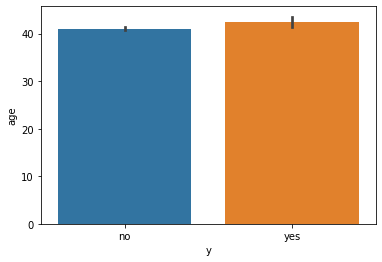

In [6]:
sns.barplot(x='y',y='age',data=bank)

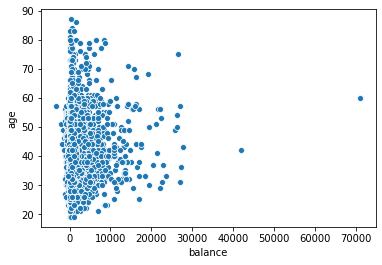

In [7]:
sns.scatterplot(x='balance',y='age',data=bank)

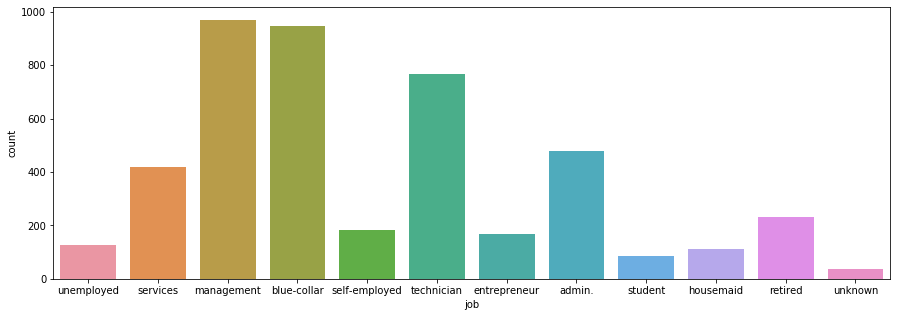

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(bank['job'])

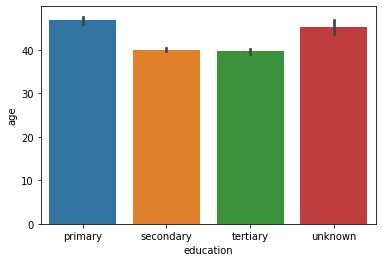

In [9]:
sns.barplot(x='education',y='age',data=bank)

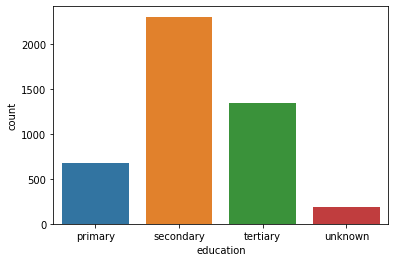

In [10]:
sns.countplot(bank['education'])

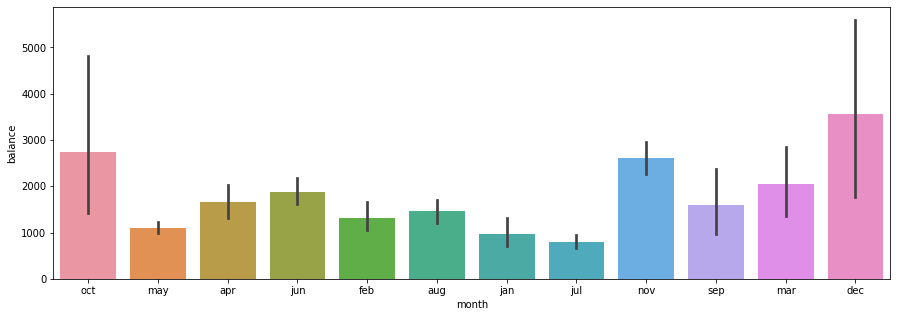

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x='month',y='balance',data=bank)

In [12]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,40.586154,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,99.787552,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [13]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008990,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009338,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094377,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010356,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.092996,-0.067833
pdays,-0.008990,0.009338,-0.094377,0.010356,-0.092996,1.000000,0.576861
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.576861,1.000000


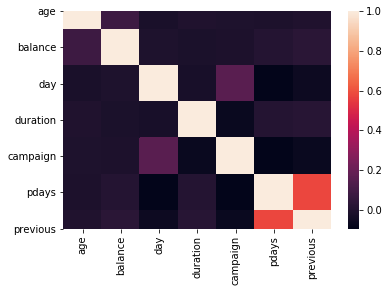

In [14]:
sns.heatmap(bank.corr())

In [15]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [17]:
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,0,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in bank.columns:
    if bank[i].dtypes==object:
        bank[i]=le.fit_transform(bank[i].astype(str))

In [19]:
from scipy.stats import zscore
z=np.abs(zscore(bank))
bank_new=bank[(z<3).all(axis=1)]
bank_new.shape

(3904, 17)

In [20]:
bank.shape

(4521, 17)

In [21]:
bank=bank_new

In [22]:
mod_x=bank.drop(['y'],axis=1)
y=bank['y']

In [23]:
mod_x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,0,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,0,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,1,1,1,0,1205,1,0,0,20,0,45,4,153,1,0
4515,32,7,2,1,0,473,1,0,0,7,5,624,5,0,0,3
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,0,0,3
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,0,0,3


In [24]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=scale.fit_transform(mod_x)

In [26]:
x=pd.DataFrame(x,columns=mod_x.columns)

In [29]:
#creating function for determining random_state
def random(alg):
    r_state=0
    for r_score in range(43,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy > r_state:
            r_state=accuracy
            final_r=r_score
    print(r_state,'at',final_r)

In [30]:
#creating function for algorithm operations and metrics
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('score=',score)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [31]:
#function for cross_val score 
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print('mean_score=',score.mean())
    print('standard deviation',score.std())

In [32]:
#Function for roc curve
def roc(alg):
    y_pred_prob=alg.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(alg)
    plt.show()
    
    roc_score=roc_auc_score(y_test,alg.predict(x_test))
    print('roc_score=',roc_score)

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
# lets start using linear_model first
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
random(lr)

0.9185415050426687 at 86


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=86)
model(lr)

score= 0.902868068833652
0.9185415050426687
[[1155   17]
 [  88   29]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1172
           1       0.63      0.25      0.36       117

    accuracy                           0.92      1289
   macro avg       0.78      0.62      0.66      1289
weighted avg       0.90      0.92      0.90      1289



In [37]:
cross_val(lr)

[0.90025575 0.89130435 0.91666667 0.91025641 0.90128205]
mean_score= 0.9039530461013836
standard deviation 0.008742565919666621


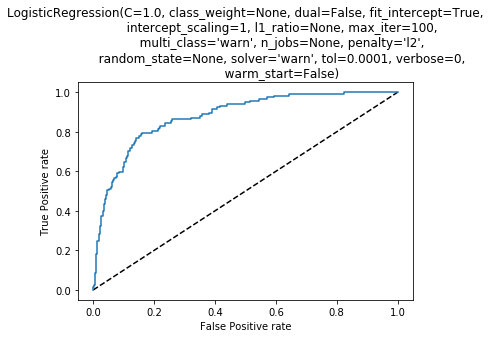

roc_score= 0.6166790642046615


In [38]:
roc(lr)

In [39]:
#lets check for decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random(dtc)

0.8890612878200155 at 59


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=59)
model(dtc)

score= 1.0
0.8906128782001551
[[1089   65]
 [  76   59]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1154
           1       0.48      0.44      0.46       135

    accuracy                           0.89      1289
   macro avg       0.71      0.69      0.70      1289
weighted avg       0.89      0.89      0.89      1289



In [41]:
cross_val(dtc)

[0.88491049 0.88107417 0.87179487 0.87435897 0.85384615]
mean_score= 0.8731969309462915
standard deviation 0.010742689940106843


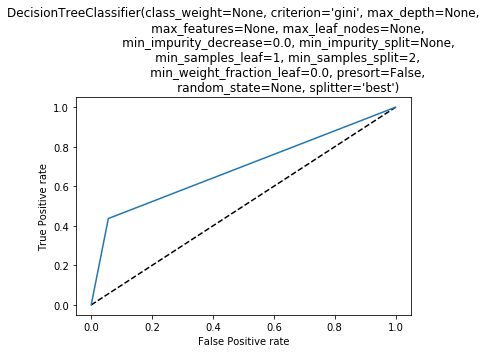

roc_score= 0.6903556069067335


In [42]:
roc(dtc)

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
random(gnb)

0.8789759503491078 at 74


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=74)
model(gnb)

score= 0.8619502868068833
0.8789759503491078
[[1077   82]
 [  74   56]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1159
           1       0.41      0.43      0.42       130

    accuracy                           0.88      1289
   macro avg       0.67      0.68      0.68      1289
weighted avg       0.88      0.88      0.88      1289



In [45]:
cross_val(gnb)

[0.82097187 0.83759591 0.88333333 0.86538462 0.83076923]
mean_score= 0.8476109908846482
standard deviation 0.023175750987727818


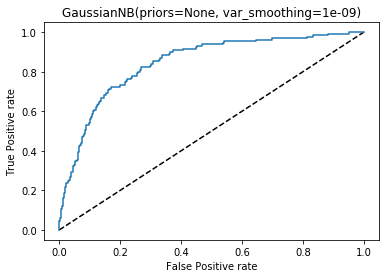

roc_score= 0.6800092918298267


In [46]:
roc(gnb)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

#using gridsearch to detrmine best neighbor
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knn,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 4}

In [48]:
knn=KNeighborsClassifier(n_neighbors=4)
random(knn)

0.9177657098525989 at 81


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=81)
model(knn)

score= 0.9135755258126195
0.9177657098525989
[[1168    6]
 [ 100   15]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1174
           1       0.71      0.13      0.22       115

    accuracy                           0.92      1289
   macro avg       0.82      0.56      0.59      1289
weighted avg       0.90      0.92      0.89      1289



In [50]:
cross_val(knn)

[0.91176471 0.9028133  0.90641026 0.91410256 0.90641026]
mean_score= 0.9083002164076334
standard deviation 0.004072347818172166


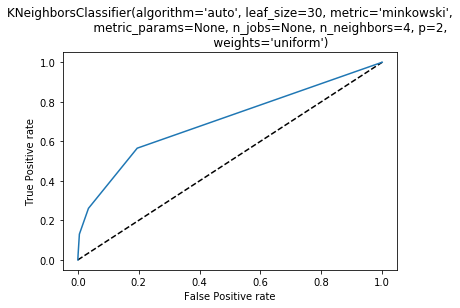

roc_score= 0.5626620250351826


In [51]:
roc(knn)

In [52]:
from sklearn.svm import SVC
svm=SVC()

#detrmining proper kernel to use
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}
grid=GridSearchCV(svm,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'C': 100, 'kernel': 'rbf'}

In [53]:
svm=SVC(kernel='rbf')
random(svm)

0.9123351435221102 at 89


In [54]:
cross_val(svm)

[0.89897698 0.89897698 0.9        0.9        0.9       ]
mean_score= 0.8995907928388747
standard deviation 0.0005011743719249664
